In [67]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt


In [68]:
log_dir = "./a2c_bipedalwalker_tensorboard/"

ppo_results = []

for i in range(1, 11):
    reader = SummaryReader(log_dir + f'PPO_{i}')
    ppo_results.append(reader.scalars)


In [69]:
# average the results    
ppo_summed = ppo_results[0]

for i in range(0,10):
    ppo_summed['value'] = ppo_summed['value'] + ppo_results[i]['value']
    
ppo_summed['value'] = ppo_summed['value'] / 10
print(ppo_summed)

      step                  tag       value
0     2048  rollout/ep_len_mean  690.495361
1     4096  rollout/ep_len_mean  662.001517
2     6144  rollout/ep_len_mean  703.037079
3     8192  rollout/ep_len_mean  636.748706
4    10240  rollout/ep_len_mean  690.196335
..     ...                  ...         ...
310  43008     train/value_loss    3.512264
311  45056     train/value_loss   10.573220
312  47104     train/value_loss   12.599708
313  49152     train/value_loss    6.586092
314  51200     train/value_loss    6.241573

[315 rows x 3 columns]


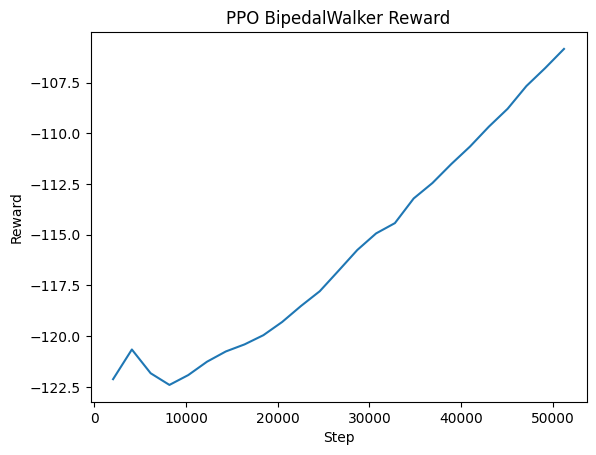

In [70]:
# Average reward
ppo_reward = ppo_summed[ppo_summed['tag'] == 'rollout/ep_rew_mean']

# draw the plot
plt.plot(ppo_reward['step'], ppo_reward['value'])
plt.title('PPO BipedalWalker Reward')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.show()

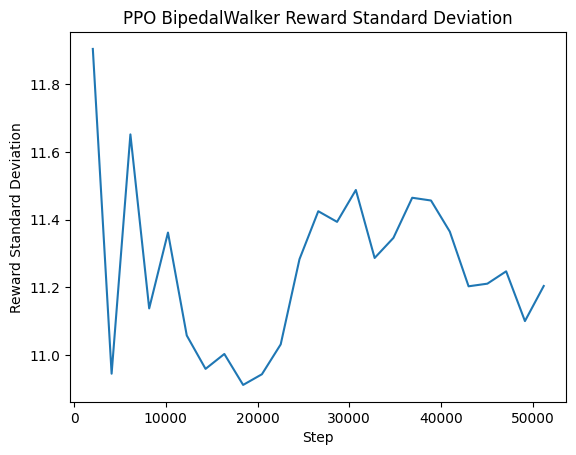

In [71]:
# standard deviation
ppo_all_rewards = ppo_results
ppo_all_rewards = [x[x['tag'] == 'rollout/ep_rew_mean'] for x in ppo_all_rewards]
ppo_avg_reward = ppo_summed[ppo_summed['tag'] == 'rollout/ep_rew_mean']

ppo_std = ppo_avg_reward.copy()
ppo_std['value'] = 0

for i in range(0,10):
    ppo_std['value'] = ppo_std['value'] + (ppo_all_rewards[i]['value'] - ppo_avg_reward['value'])**2
    
ppo_std['value'] = (ppo_std['value'] / 10)**0.5

# draw the plot
plt.plot(ppo_std['step'], ppo_std['value'])
plt.title('PPO BipedalWalker Reward Standard Deviation')
plt.xlabel('Step')
plt.ylabel('Reward Standard Deviation')
plt.show()



In [72]:
#save the results
# writer = SummaryWriter(log_dir + 'PPO')